# PUBG Project Description
need text here

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.models import load_model

Using TensorFlow backend.


In [4]:
df_train = pd.read_csv('data/train_V2.csv')
df_test = pd.read_csv('data/test_V2.csv')

## 1. Data exploration

In [5]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
df_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [7]:
print("Shape ={}\n".format(df_train.shape)) 
print("Shape ={}\n".format(df_test.shape)) 

Shape =(4446966, 29)

Shape =(1934174, 28)



In [8]:
df_train.dropna()
df_test.dropna()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.000,0,0,588.000,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.000,0,0,2017.000,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.000,0,0,787.800,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.000,0,0,1812.000,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.000,0,0,2963.000,4,0
5,3e2539b5d78183,029b5a79e08cd6,10186f5c852f62,0,0,0.00,0,0,0,89,...,1490,0,0.0,0,0.000,0,0,0.000,0,0
6,d812d2f1d88a02,6285bb4eec83e4,f185809740a1a7,0,3,470.70,3,2,17,3,...,1538,0,0.0,0,0.000,0,0,1000.000,4,0
7,a8a377e4d43bf8,61ec2e7730a3b8,d31adc82a4930e,0,0,68.61,0,0,0,73,...,1487,0,0.0,0,0.000,0,0,1217.000,5,0
8,f18301e30d47d3,e7d609e08f09b6,bcde504ef16743,0,0,0.00,0,0,0,56,...,1640,0,2355.0,0,0.000,0,0,1390.000,7,0
9,ec7b965ef978b3,c4c19ef6d6c6d9,6dc5b34c92d5ff,0,0,67.32,0,0,0,54,...,-1,0,0.0,0,0.000,0,0,1634.000,5,1495


Clearly, the dataset is neat, which means no NaNs in the dataset need to be cleaned. 

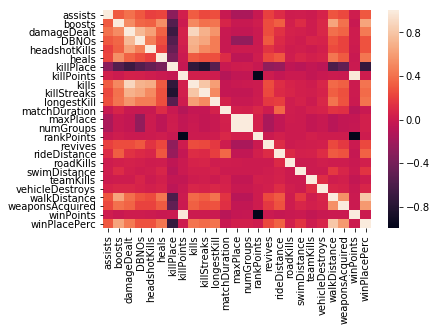

In [9]:
import seaborn as sns
corr = df_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Need to analyse the corralation between parameters here.

## 2. Feature Engineering

In [10]:
df_train["distance"] = df_train["rideDistance"]+df_train["walkDistance"]+df_train["swimDistance"]
df_train["skill"] = df_train["headshotKills"]+df_train["roadKills"]
df_test["distance"] = df_test["rideDistance"]+df_test["walkDistance"]+df_test["swimDistance"]
df_test["skill"] = df_test["headshotKills"]+df_test["roadKills"]

In [11]:
input_columns = list(df_test.columns)
output = "winPlacePerc"
X = df_train[input_columns]
Y = df_train[output]
Xt = df_test[input_columns]

## 3. Model building

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1024)
scaler = preprocessing.QuantileTransformer().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
Xt = scaler.transform(Xt)
print("x_train", x_train.shape, x_train.min(), x_train.max())
print("x_test", x_test.shape, x_test.min(), x_test.max())
print("Xt", Xt.shape, Xt.min(), Xt.max())

ValueError: could not convert string to float: 'squad-fpp'

注意这下面全是粘贴的需要修改

In [ ]:
model = Sequential()
model.add(Dense(512, kernel_initializer='he_normal', input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [ ]:
optimizer = optimizers.Adam(lr=0.01, epsilon=1e-8, decay=1e-4, amsgrad=False)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10, verbose=0):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule, verbose)

lr_sched = step_decay_schedule(initial_lr=0.1, decay_factor=0.9, step_size=1, verbose=1)
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', mode = 'min', patience=4, verbose=1)

In [ ]:
history = model.fit(x_train, y_train, 
                 validation_data=(x_test, y_test),
                 epochs=30,
                 batch_size=32768,
                 callbacks=[lr_sched,early_stopping], 
                 verbose=1)

## 4. Evaluation

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Abosulte Error')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(Xt)
pred = pred.ravel()

# pred = (pred + 1) / 2
df_test['winPlacePercPred'] = np.clip(pred, a_min=0, a_max=1)


aux = df_test.groupby(['matchId','groupId'])['winPlacePercPred'].agg('mean').groupby('matchId').rank(pct=True).reset_index()
aux.columns = ['matchId','groupId','winPlacePerc']
df_test = df_test.merge(aux, how='left', on=['matchId','groupId'])
    
submission = df_test[['Id', 'winPlacePerc']]

submission.to_csv('submission.csv', index=False)